### Cleaning To Make Clean Dataset for Analysis

In [152]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #just to makes sure all columns are visible
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_rows', None)

In [153]:
df = pd.read_csv('Tissue_dataset_2019_2023.csv')

/var/folders/rr/4wp1syc10818wgtwwcq7_nvw0000gn/T/ipykernel_20620/3928253277.py:1: DtypeWarning: Columns (14,33,39,70,77,78,84,87,89,90,91,93,94,95,96,100,107,108,109,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Tissue_dataset_2019_2023.csv')


I am taking a preliminary look at how my consolidated data look like via looking at the column heads to understand what kind of information I have in here.

In [154]:
df.head()

,ProgramName,ParentProjectName,ProjectCode,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissuePrep,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Matrix,Method,Analyte,Unit,Result,ResQualCode,MDL,RL,QACode,BatchVerification,ComplianceCode,DilutionFactor,LabSampleID,ResultComments,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,CompositeComments,LabBatch,LabBatchComments,AnalyzingAgency,SubmittingAgency,LabSubmissionCode,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,LatestDateSampled,SampleDateRange(Days),SampleDate,CollectionTime,TissueResultRowID,CompositeParentProjectName,CompositeProjectCode,CompositeProjectName,CompositeCompositeID,CompositeStationName,CompositeStationCode,CompositeLatitude,CompositeLongitude,CompositeGeometryShape,CompositeSampleDate,CompositeProgramName,CompositeCompositeType,CompositeCommonName,CompositeFinalID,CompositeTissuePrep,CompositeTissueName,CompositeSampleTypeCode,SamplingAgency,GroupSample,ProtocolCode,LocationCode,HydroModLoc,Hydromod,CollectionReplicate,CollectionMethodName,CollectionDeviceName,OrganismID,TotalCount,TagNumber,ForkLength,TotalLength,LengthSource,OrganismWeight,UnitLengthFish,UnitWeightFish,WeightSource,SizeDescr,Age,Sex,Anomaly,ProcessedOrganismsExpandedComments,TissueID,TissueWeight,UnitTissueWeight,PartsComments,CompAgency,CompositeWeight,UnitCompositeWeight,HomogonizedDate,CompositeRowID,PersonnelCode,SampleComments,TissueCollectionComments,LocationDetailTIComments,CompositeJunctionRowID,TLMin(mm),DWC_AnalyteWFraction,SampleID,DataQuality,DataQualityIndicator,Datum
0,Surface Water Ambient Monitoring Program,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study 2022,C1_90208OCNHRLN22LOB,Oceanside Harbor,90208OCNH,33.209001,-117.401035,PolygonCent,04/19/2023,normal,California Spiny Lobster,Panulirus interruptus,NaN,whole organism no shell,4.0,Composite,1.0,1.0,tissue,EPA 200.8m,Arsenic,ug/g ww,8.46,=,0.06,0.18,NaN,VAC,Com,1.0,C122OCHLOB,NaN,FieldFrozen,04/19/2023,EPA 3052M,06/22/2023,06/27/2023,"4 lobsters; 62.03g Arc1, 59.58g Arc2(PFAS), 63...",MPSL-DFW_2023Dig41_T_TM,NaN,MPSL-DFW,MPSL-DFW,A,Crustacean,411.0,84.0,76.0,85.714286,"Unk (0), M (2), F (2)",04/19/2023,0.0,2023/04/19,21:30,F8297F92-4969-466B-80B6-677163F87D09,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study 2022,C1_90208OCNHRLN22LOB,Oceanside Harbor,90208OCNH,33.209,-117.401,PolygonCent,04/19/2023,Surface Water Ambient Monitoring Program,normal,California Spiny Lobster,Panulirus interruptus,NaN,whole organism no shell,Composite,Marine Pollution Studies Laboratory-DFW,NaN,BMP_Realign_RWB9_21,OpenWaterTrap1,NaN,NaN,1.0,Trap,FishTrap,90208OCNHRLN22LOB01-03,1.0,RLN22LOB22,-88.0,84.0,Field,544.0,mm,g,Field,NaN,NR,F,NaN,carapace length in TL column,RLN22LOB22_C,337.41,g,NaN,MPSL-DFW,1008.82,g,05/15/2023,5900C737-1E15-4F1E-AAEB-4F3D49D9C492,NaN,NaN,NaN,NaN,6B5F75AA-A482-4603-AFD7-799E12E69089,72.0,"Arsenic, Total",NaN,Passed,NaN,WGS84
1,Surface Water Ambient Monitoring Program,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study 2022,C1_90208OCNHRLN22LOB,Oceanside Harbor,90208OCNH,33.209001,-117.401035,PolygonCent,04/19/2023,normal,California Spiny Lobster,Panulirus interruptus,NaN,whole organism no shell,4.0,Composite,1.0,1.0,tissue,EPA 200.8m,Arsenic,ug/g ww,8.46,=,0.06,0.18,NaN,VAC,Com,1.0,C122OCHLOB,NaN,FieldFrozen,04/19/2023,EPA 3052M,06/22/2023,06/27/2023,"4 lobsters; 62.03g Arc1, 59.58g Arc2(PFAS), 63...",MPSL-DFW_2023Dig41_T_TM,NaN,MPSL-DFW,MPSL-DFW,A,Crustacean,411.0,84.0,76.0,85.714286,"Unk (0), M (2), F (2)",04/19/2023,0.0,2023/04/19,21:30,F8297F92-4969-466B-80B6-677163F87D09,SWAMP Bioaccumulation Monitoring Program,SWB_Realign_RWB9_2022,Statewide BMP Realignment RWB9 Study

Taking a quick glace at the distribution of my null values. Some columns shows a very high percentage of null values, but if they are non-critical columns, it should be ok. I am a little nervous about the 42% of null values within the "Results" column as it is over the 30% threshold. I will have to dig into it a little bit more to understand how much that would affect my analysis.

In [155]:
df.isna().mean()*100

ProgramName                             0.000000
ParentProjectName                       0.000000
ProjectCode                             0.000000
ProjectName                             0.000000
CompositeID                             0.000000
StationName                             0.000000
StationCode                             0.000000
Latitude                                0.000000
Longitude                               0.000000
GeometryShape                           6.911073
EarliestDateSampled                     0.000000
CompositeType                           0.000000
CommonName                              0.000000
FinalID                                 0.000000
TissuePrep                             22.949580
TissueName                              0.000000
NumberFishperComp                       0.035517
SampleTypeCode                          0.000000
CompositeReplicate                      0.000000
ResultReplicate                         0.000000
Matrix              

In [156]:
df.shape # this is a lot of columns and rows

(216797, 117)

Some of the key information I could pick up from the headers are: CommonName(Species), Analytes(Chemicals), Result(Analytes results), StationName(Locations), Latitude, Longitude,CompositeType,TissueName, SampleDate, Sex,WeightAvg(g),TLAvgLength(mm).

These are key informations to have since the analysis is mainly focused on the levels of harmful chemical presence in which species and at what location, in order to help us get a general sense of which waterbody that samples has been taken from seems to be the most polluted. Where in the tissue was taken from the organism, its size (lenght & mass), as well as sex, plays a role in the bioacculation affects of the chemicals.

In [157]:
df2 = df.sample(frac=0.2) #taking a fraction of the main data to look through, taking a 20% sample

In [158]:
df2.shape # much more managable after taking a 20% random sample to work with

(43359, 117)

In [159]:
null_counts = df2.isnull().sum().sum()
null_counts 

788046

In [160]:
counts = df2.count().sum() #total value counts in dataframe
counts

4284957

In [161]:
null_counts/(counts+null_counts) # total amounts of values in DF
#Still a pretty high amount of null values, but 37% I can work with 

0.15534112635060535

Next I want to look into our three most important columns - CommonName, Analyte, & StationName to get a sense of what kind of general group would be needed

In [162]:
df['Analyte'].nunique()

644

In [163]:
df['Analyte'].unique()

array(['Arsenic', 'Moisture', 'Selenium', 'Mercury', 'Lipid', 'PCB 001',
       'PCB 001(Surrogate)', 'PCB 002', 'PCB 003', 'PCB 003(Surrogate)',
       'PCB 004', 'PCB 004(Surrogate)', 'PCB 005', 'PCB 006', 'PCB 007',
       'PCB 008', 'PCB 009', 'PCB 010', 'PCB 011', 'PCB 012', 'PCB 013',
       'PCB 014', 'PCB 015', 'PCB 015(Surrogate)', 'PCB 016', 'PCB 017',
       'PCB 018', 'PCB 019', 'PCB 019(Surrogate)', 'PCB 020', 'PCB 021',
       'PCB 022', 'PCB 023', 'PCB 024', 'PCB 025', 'PCB 026', 'PCB 027',
       'PCB 028', 'PCB 028(Surrogate)', 'PCB 029', 'PCB 030', 'PCB 031',
       'PCB 032', 'PCB 033', 'PCB 034', 'PCB 035', 'PCB 036', 'PCB 037',
       'PCB 037(Surrogate)', 'PCB 038', 'PCB 039', 'PCB 040', 'PCB 041',
       'PCB 042', 'PCB 043', 'PCB 044', 'PCB 045', 'PCB 046', 'PCB 047',
       'PCB 048', 'PCB 049', 'PCB 050', 'PCB 051', 'PCB 052', 'PCB 053',
       'PCB 054', 'PCB 054(Surrogate)', 'PCB 055', 'PCB 056', 'PCB 057',
       'PCB 058', 'PCB 059', 'PCB 060', 'PCB 061', 

In [164]:
df['CommonName'].nunique()

97

In [165]:
df['StationName'].nunique()

220

In [166]:
column_list = df.columns.tolist()
column_list

['ProgramName',
 'ParentProjectName',
 'ProjectCode',
 'ProjectName',
 'CompositeID',
 'StationName',
 'StationCode',
 'Latitude',
 'Longitude',
 'GeometryShape',
 'EarliestDateSampled',
 'CompositeType',
 'CommonName',
 'FinalID',
 'TissuePrep',
 'TissueName',
 'NumberFishperComp',
 'SampleTypeCode',
 'CompositeReplicate',
 'ResultReplicate',
 'Matrix',
 'Method',
 'Analyte',
 'Unit',
 'Result',
 'ResQualCode',
 'MDL',
 'RL',
 'QACode',
 'BatchVerification',
 'ComplianceCode',
 'DilutionFactor',
 'LabSampleID',
 'ResultComments',
 'PrepPreservationName',
 'PrepPreservationDate',
 'DigestExtractMethod',
 'DigestExtractDate',
 'AnalysisDate',
 'CompositeComments',
 'LabBatch',
 'LabBatchComments',
 'AnalyzingAgency',
 'SubmittingAgency',
 'LabSubmissionCode',
 'OrganismGroup',
 'WeightAvg(g)',
 'TLMax(mm)',
 'TLAvgLength(mm)',
 'CompSizeCheck',
 'SexSummary',
 'LatestDateSampled',
 'SampleDateRange(Days)',
 'SampleDate',
 'CollectionTime',
 'TissueResultRowID',
 'CompositeParentProjectN

To begin data cleaning, I am looking at columns that I can drop. Couple reasons for doing this is 1) if I drop columns that are not needed for analysis and contains lots of null values, that would take care of some of the null values we see above, 2) it condenses the dataframe into a more managable size for my computer to handle


Since I mainly want to focus on correlations between analyte, species, location, and time, I can drop a lot of fields that are unrelated to those values. The data that we want to focus on is the field data, not the lab research methods data. Here are the list of the columns I will be dropping and why. 

Dictionary of columns could be found here: https://data.ca.gov/dataset/surface-water-aquatic-organism-tissue-sample-results/resource/206da2ff-70f2-4f56-aacc-2a39ef3bf15b

Data that is not core for the purpose of this analysis would be: tissue sample preparation methods, internal codes used for agency reporting, columns that are all nulls, comments regarding lab analysis methods, and project agencies information. 

After prelimary EDA, I can decide if any more layers is needed and can add any of these columns back in. But for now, I can drop them to focus on the core columns mentioned above.

Columns about sample prep methods:
TissuePrep,Matrix,Method,DilutionFactor,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,CompositeTissuePrep,CollectionMethodName,CollectionDeviceName,LengthSource,WeightSource,Datum,MDL,RL,CollectionTime

Columns containing internal compliance/quality codes:
QACode,QACode,BatchVerification,ComplianceCode,LabSampleID,LabSubmissionCode,GroupSample,HydroModLoc,TagNumber,CompositeRowID,PersonnelCode,DWC_AnalyteWFraction,ResQualCode,OrganismID,TissueID
 
Columns that are mostly null and does not pertain critical information:
ResultComments,CompositeJunctionRowID,SampleID,SizeDescr

Columns that are comments regarding lab analysis methods:
LabBatchComments,CompositeComments,ProcessedOrganismsExpandedComments,PartsComments,SampleComments,TissueCollectionComments,LocationDetailTIComments,DataQuality,DataQualityIndicator

Columns about agencies:
CompAgency,AnalyzingAgency,SubmittingAgency,CompositeParentProjectName,CompositeProjectCode,CompositeProjectName,SamplingAgency,ProgramName,ParentProjectName,ProjectCode	

In [167]:
drop_list = ['TissuePrep',
 'Matrix',
 'Method',
 'QACode',
 'BatchVerification',
 'ComplianceCode',
 'DilutionFactor',
 'LabSampleID',
 'ResultComments',
 'PrepPreservationName',
 'PrepPreservationDate',
 'DigestExtractMethod',
 'DigestExtractDate',
 'AnalysisDate',
 'CompositeComments',
 'LabBatch',
 'LabBatchComments',
 'AnalyzingAgency',
 'SubmittingAgency',
 'LabSubmissionCode',
 'LatestDateSampled',
 'SampleDateRange(Days)',
 'SampleDate',
 'CollectionTime',
 'CompositeParentProjectName',
 'CompositeProjectCode',
 'CompositeProjectName',
 'CompositeSampleDate',
 'CompositeProgramName',
 'CompositeTissuePrep',
 'SamplingAgency',
 'GroupSample',
 'ProtocolCode',
 'LocationCode',
 'HydroModLoc',
 'Hydromod',
 'CollectionMethodName',
 'CollectionDeviceName',
 'TagNumber',
 'LengthSource',
 'WeightSource',
 'Anomaly',
 'ProcessedOrganismsExpandedComments',
 'PartsComments',
 'CompAgency',
 'CompositeRowID',
 'PersonnelCode',
 'SampleComments',
 'TissueCollectionComments',
 'LocationDetailTIComments',
 'CompositeJunctionRowID',
 'DWC_AnalyteWFraction',
 'DataQuality',
 'DataQualityIndicator',
 'Datum',
 'SampleID',
 'SizeDescr',
 'ResQualCode',	
 'MDL',	
 'RL',
 'OrganismID',
 'TissueID',
 'ProgramName',
 'ParentProjectName',
 'ProjectCode']

len(drop_list)

65

In [168]:
df2 = df2.drop(columns = drop_list)
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeCompositeID,CompositeStationName,CompositeStationCode,CompositeLatitude,CompositeLongitude,CompositeGeometryShape,CompositeCompositeType,CompositeCommonName,CompositeFinalID,CompositeTissueName,CompositeSampleTypeCode,CollectionReplicate,TotalCount,ForkLength,TotalLength,OrganismWeight,UnitLengthFish,UnitWeightFish,Age,Sex,TissueWeight,UnitTissueWeight,CompositeWeight,UnitCompositeWeight,HomogonizedDate,TLMin(mm)
90485,RWB3 Special Studies BOG,C1_30542PAJBR320BRS,Pajaro River Mouth Beach,30542PAJB,36.85235,-121.81357,Point,07/15/2020,normal,Barred Surfperch,Amphistichus argenteus,fillet,10.0,Composite,1.0,1.0,PCB 110,ng/g ww,NaN,Fish,134.500000,250.0,192.500000,66.800000,"Unk (10), M (0), F (0)",5D4ECD74-F5BC-4DCB-A8AB-758C282740E5,C1_30542PAJBR320BRS,Pajaro River Mouth Beach,30542PAJB,36.8524,-121.814,Point,normal,Barred Surfperch,Amphistichus argenteus,fillet,Composite,1.0,1.0,160.0,172.0,85.00,mm,g,NR,LAB,14.28,g,142.81,g,09/25/2020,167.0
100564,RWB3 Special Studies BOG,C1_31228SMRBR320BRS,Santa Maria River Beach,31228SMRB,34.97317,-120.64859,Point,08/05/2020,normal,Barred Surfperch,Amphistichus argenteus,fillet,9.0,Composite,1.0,1.0,"DDD(p,p')",ng/g ww,NaN,Fish,96.177778,190.0,176.555556,85.789474,"Unk (9), M (0), F (0)",77A027F0-68FE-472D-A099-4E107EB42A63,C1_31228SMRBR320BRS,Santa Maria River Beach,31228SMRB,34.9732,-120.649,Point,normal,Barred Surfperch,Amphistichus argenteus,fillet,Composite,1.0,1.0,158.0,167.0,82.00,mm,g,NR,LAB,22.51,g,202.59,g,09/23/2020,163.0
27609,RWB7 Trend Monitoring Fall CY2021,C1_723NROTWMR721TIL,New River Outlet,723NROTWM,33.10472,-115.66361,Point,11/02/2021,normal,Tilapia spp.,Tilapia,fillet,20.0,Composite,1.0,1.0,PCB 202,ug/Kg ww,0.00105,Fish,32.262000,171.0,119.200000,58.479532,"Unk (20), M (0), F (0)",EADB69A7-ADC5-45EB-BACE-8E5017A71413,C1_723NROTWMR721TIL,New River Outlet,723NROTWM,33.1047,-115.664,Point,normal,Tilapia spp.,Tilapia,fillet,Composite,1.0,1.0,114.0,118.0,28.08,mm,g,NR,LAB,3.59,g,71.80,g,02/08/2022,100.0
38815,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_412PECPRKBOG21LMB,Peck Road Water Conservation Park,412PECPRK,34.10231,-118.01268,PolygonCent,06/29/2021,normal,Largemouth Bass,Micropterus salmoides,fillet,5.0,Composite,1.0,1.0,PCB 067,ug/Kg ww,0.00254,Fish,580.000000,365.0,344.000000,90.410959,"Unk (5), M (0), F (0)",F34532ED-0004-4CA2-B7EA-8A79A129AF96,C1_412PECPRKBOG21LMB,Peck Road Water Conservation Park,412PECPRK,34.1023,-118.013,PolygonCent,normal,Largemouth Bass,Micropterus salmoides,fillet,Composite,1.0,1.0,328.0,344.0,650.00,mm,g,NR,LAB,59.78,g,298.90,g,11/22/2021,330.0
61499,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_516TC0293BOG21LMB,Lake Combie,516TC0293,39.00670,-121.04311,PolygonCent,07/06/2021,normal,Largemouth Bass,Micropterus salmoides,fillet,5.0,Composite,1.0,1.0,PCB 106,ug/Kg ww,NaN,Fish,1093.000000,453.0,414.600000,83.222958,"Unk (2), M (1), F (2)",86069612-9915-40F8-831A-77E80428C27B,C2_516TC0293BOG21LMB,Lake Combie,516TC0293,39.0067,-121.043,PolygonCent,normal,Largemouth Bass,Micropterus salmoides,fillet,Composite,1.0,1.0,368.0,378.0,805.00,mm,g,NR,LAB,48.69,g,243.45,g,10/15/2021,377.0


In [169]:
df2.shape #now we are down to 52 columns instead of the original 117

(43359, 52)

Next, I will look at columns that could hold duplicate information. These columns look like good candidates to example since their headers are almost the same, except one is information on the composite. A composite is when researchers take tissues of multiple critters from the same species in the same location within a small timeframe, and combine them into a single sample to analyze. Lots of times this method is used to analyze smaller organisms such as clams. It is very likely that these columns hold same information.

In [170]:
#set 1 is the column to keep 
set_1 = ['CompositeID',
 'StationName',
 'StationCode',
 'Latitude',
 'Longitude',
 'CompositeType',
 'CommonName',
 'FinalID',
 'TissueName',
 'SampleTypeCode',
 'CompositeReplicate',
 'GeometryShape']

#set 2 is the columns to drop is it contains duplicated values as columns in set 1
set_2 = ['CompositeCompositeID',
 'CompositeStationName',
 'CompositeStationCode',
 'CompositeLatitude',
 'CompositeLongitude',
 'CompositeCompositeType',
 'CompositeCommonName',
 'CompositeFinalID',
 'CompositeTissueName',
 'CompositeSampleTypeCode',
 'CollectionReplicate',
 'CompositeGeometryShape']

print(len(set_1), len(set_2))

12 12


In [171]:
for i in range(len(set_1)): # range function iterates down the length of list
    compare1 = df2[set_1[i]].isin(df2[set_2[i]]) # compares values of columns in set 1 to values of columns in set 2
    print(compare1.value_counts())


CompositeID
True    43359
Name: count, dtype: int64
StationName
True    43359
Name: count, dtype: int64
StationCode
True    43359
Name: count, dtype: int64
Latitude
False    36811
True      6548
Name: count, dtype: int64
Longitude
False    41955
True      1404
Name: count, dtype: int64
CompositeType
True    43359
Name: count, dtype: int64
CommonName
True    43359
Name: count, dtype: int64
FinalID
True    43359
Name: count, dtype: int64
TissueName
True    43359
Name: count, dtype: int64
SampleTypeCode
True    43359
Name: count, dtype: int64
CompositeReplicate
True    43359
Name: count, dtype: int64
GeometryShape
True    43359
Name: count, dtype: int64


In [172]:
# I removed 'CompositeStationCode' and 'CompositeLatitude'from the drop list since they are showing false matches with the latitude & longitude columns
drop_set_2 = ['CompositeCompositeID',
 'CompositeStationName',
 'CompositeStationCode',
 'CompositeCompositeType',
 'CompositeCommonName',
 'CompositeFinalID',
 'CompositeTissueName',
 'CompositeSampleTypeCode',
 'CollectionReplicate',
 'CompositeGeometryShape']
df2 = df2.drop(columns = drop_set_2) # I can now drop these
df2.head()


,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,FinalID,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight,UnitLengthFish,UnitWeightFish,Age,Sex,TissueWeight,UnitTissueWeight,CompositeWeight,UnitCompositeWeight,HomogonizedDate,TLMin(mm)
90485,RWB3 Special Studies BOG,C1_30542PAJBR320BRS,Pajaro River Mouth Beach,30542PAJB,36.85235,-121.81357,Point,07/15/2020,normal,Barred Surfperch,Amphistichus argenteus,fillet,10.0,Composite,1.0,1.0,PCB 110,ng/g ww,NaN,Fish,134.500000,250.0,192.500000,66.800000,"Unk (10), M (0), F (0)",5D4ECD74-F5BC-4DCB-A8AB-758C282740E5,36.8524,-121.814,1.0,160.0,172.0,85.00,mm,g,NR,LAB,14.28,g,142.81,g,09/25/2020,167.0
100564,RWB3 Special Studies BOG,C1_31228SMRBR320BRS,Santa Maria River Beach,31228SMRB,34.97317,-120.64859,Point,08/05/2020,normal,Barred Surfperch,Amphistichus argenteus,fillet,9.0,Composite,1.0,1.0,"DDD(p,p')",ng/g ww,NaN,Fish,96.177778,190.0,176.555556,85.789474,"Unk (9), M (0), F (0)",77A027F0-68FE-472D-A099-4E107EB42A63,34.9732,-120.649,1.0,158.0,167.0,82.00,mm,g,NR,LAB,22.51,g,202.59,g,09/23/2020,163.0
27609,RWB7 Trend Monitoring Fall CY2021,C1_723NROTWMR721TIL,New River Outlet,723NROTWM,33.10472,-115.66361,Point,11/02/2021,normal,Tilapia spp.,Tilapia,fillet,20.0,Composite,1.0,1.0,PCB 202,ug/Kg ww,0.00105,Fish,32.262000,171.0,119.200000,58.479532,"Unk (20), M (0), F (0)",EADB69A7-ADC5-45EB-BACE-8E5017A71413,33.1047,-115.664,1.0,114.0,118.0,28.08,mm,g,NR,LAB,3.59,g,71.80,g,02/08/2022,100.0
38815,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_412PECPRKBOG21LMB,Peck Road Water Conservation Park,412PECPRK,34.10231,-118.01268,PolygonCent,06/29/2021,normal,Largemouth Bass,Micropterus salmoides,fillet,5.0,Composite,1.0,1.0,PCB 067,ug/Kg ww,0.00254,Fish,580.000000,365.0,344.000000,90.410959,"Unk (5), M (0), F (0)",F34532ED-0004-4CA2-B7EA-8A79A129AF96,34.1023,-118.013,1.0,328.0,344.0,650.00,mm,g,NR,LAB,59.78,g,298.90,g,11/22/2021,330.0
61499,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_516TC0293BOG21LMB,Lake Combie,516TC0293,39.00670,-121.04311,PolygonCent,07/06/2021,normal,Largemouth Bass,Micropterus salmoides,fillet,5.0,Composite,1.0,1.0,PCB 106,ug/Kg ww,NaN,Fish,1093.000000,453.0,414.600000,83.222958,"Unk (2), M (1), F (2)",86069612-9915-40F8-831A-77E80428C27B,39.0067,-121.043,1.0,368.0,378.0,805.00,mm,g,NR,LAB,48.69,g,243.45,g,10/15/2021,377.0


I find it curious that the longitude & latitdue columns are returning some false matches because the StationName for both non-composite and composite samples are the same. It could be some keying errors causing that issue. It is worth it to investigate later on.

In [173]:
df2.shape # the columns in set 2 are dropped

(43359, 42)

For this particular column, FinalID, I have a feeling that it is holding the scientific name for the CommonName. To further prove it, I grouped the dataset by the CommonName to see how many unique values of FinalID would show up. It is a 1:1 relationship.

In [174]:
df2.groupby(['CommonName'])['FinalID'].unique() #CommonName & FinalID actually shows same information, FinalID is just the scientific name

CommonName
Asiatic Clam                           [Potamocorbula amurensis]
Barred Surfperch                        [Amphistichus argenteus]
Bat Ray                                 [Myliobatis californica]
Black Crappie                           [Pomoxis nigromaculatus]
Black Perch                                 [Embiotoca jacksoni]
Black Rockfish                               [Sebastes melanops]
Blue Catfish                                [Ictalurus furcatus]
Blue Rockfish                                [Sebastes mystinus]
Bluegill                                   [Lepomis macrochirus]
Brown Bullhead                              [Ameiurus nebulosus]
Brown Rockfish                            [Sebastes auriculatus]
Brown Trout                                       [Salmo trutta]
California Corbina                      [Menticirrhus undulatus]
California Halibut                   [Paralichthys californicus]
California Mussel                        [Mytilus californianus]
California Spi

In [175]:
df2 = df2.drop(columns = ['FinalID']) # I can now drop these

In [176]:
df2.shape

(43359, 41)

Next, I am looking at the columns that hold the measurement unit to see what's in there. I have noticed that for all the mass measurements, the measurement unit is embedded within the column head, i.e.  WeightAvg(g). This gives me a feeling that there are numeric results that represents different measurement unit values.

In [177]:
#taking a look at the unit columns to see what kind of info there is

unit = ['Unit','UnitLengthFish','UnitWeightFish','UnitTissueWeight','UnitCompositeWeight'] 

for col in range(len(unit)):
    print(df2[unit[col]].value_counts())

Unit
ng/g ww       15264
ug/Kg ww      11378
% recovery     4737
ug/g ww        4535
%              4195
ng/g dw        1262
ug/Kg dw        703
ug/g dw         616
yr              386
% ww            205
pg/g dw          61
mg/Kg dw         11
mg/Kg ww          6
Name: count, dtype: int64
UnitLengthFish
mm    31935
cm       74
Name: count, dtype: int64
UnitWeightFish
g    31899
Name: count, dtype: int64
UnitTissueWeight
g    43359
Name: count, dtype: int64
UnitCompositeWeight
g    43359
Name: count, dtype: int64


All the weight unit columns are in g, I can concatentate the unit into the results header

In [178]:
df2= pd.concat([df2, df2.rename(columns={'OrganismWeight': 'OrganismWeight(g)', 'TissueWeight': 'TissueWeight(g)', 'CompositeWeight': 'CompositeWeight(g)'}, inplace=True)])
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,UnitWeightFish,Age,Sex,TissueWeight(g),UnitTissueWeight,CompositeWeight(g),UnitCompositeWeight,HomogonizedDate,TLMin(mm)
90485,RWB3 Special Studies BOG,C1_30542PAJBR320BRS,Pajaro River Mouth Beach,30542PAJB,36.85235,-121.81357,Point,07/15/2020,normal,Barred Surfperch,fillet,10.0,Composite,1.0,1.0,PCB 110,ng/g ww,NaN,Fish,134.500000,250.0,192.500000,66.800000,"Unk (10), M (0), F (0)",5D4ECD74-F5BC-4DCB-A8AB-758C282740E5,36.8524,-121.814,1.0,160.0,172.0,85.00,mm,g,NR,LAB,14.28,g,142.81,g,09/25/2020,167.0
100564,RWB3 Special Studies BOG,C1_31228SMRBR320BRS,Santa Maria River Beach,31228SMRB,34.97317,-120.64859,Point,08/05/2020,normal,Barred Surfperch,fillet,9.0,Composite,1.0,1.0,"DDD(p,p')",ng/g ww,NaN,Fish,96.177778,190.0,176.555556,85.789474,"Unk (9), M (0), F (0)",77A027F0-68FE-472D-A099-4E107EB42A63,34.9732,-120.649,1.0,158.0,167.0,82.00,mm,g,NR,LAB,22.51,g,202.59,g,09/23/2020,163.0
27609,RWB7 Trend Monitoring Fall CY2021,C1_723NROTWMR721TIL,New River Outlet,723NROTWM,33.10472,-115.66361,Point,11/02/2021,normal,Tilapia spp.,fillet,20.0,Composite,1.0,1.0,PCB 202,ug/Kg ww,0.00105,Fish,32.262000,171.0,119.200000,58.479532,"Unk (20), M (0), F (0)",EADB69A7-ADC5-45EB-BACE-8E5017A71413,33.1047,-115.664,1.0,114.0,118.0,28.08,mm,g,NR,LAB,3.59,g,71.80,g,02/08/2022,100.0
38815,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_412PECPRKBOG21LMB,Peck Road Water Conservation Park,412PECPRK,34.10231,-118.01268,PolygonCent,06/29/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 067,ug/Kg ww,0.00254,Fish,580.000000,365.0,344.000000,90.410959,"Unk (5), M (0), F (0)",F34532ED-0004-4CA2-B7EA-8A79A129AF96,34.1023,-118.013,1.0,328.0,344.0,650.00,mm,g,NR,LAB,59.78,g,298.90,g,11/22/2021,330.0
61499,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_516TC0293BOG21LMB,Lake Combie,516TC0293,39.00670,-121.04311,PolygonCent,07/06/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 106,ug/Kg ww,NaN,Fish,1093.000000,453.0,414.600000,83.222958,"Unk (2), M (1), F (2)",86069612-9915-40F8-831A-77E80428C27B,39.0067,-121.043,1.0,368.0,378.0,805.00,mm,g,NR,LAB,48.69,g,243.45,g,10/15/2021,377.0


In [179]:
df2 = df2.drop(columns = ['UnitWeightFish','UnitTissueWeight','UnitCompositeWeight']) 
df2.head()

# I can now drop these since these columns have single units and can be indicated in the headers themselves

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
90485,RWB3 Special Studies BOG,C1_30542PAJBR320BRS,Pajaro River Mouth Beach,30542PAJB,36.85235,-121.81357,Point,07/15/2020,normal,Barred Surfperch,fillet,10.0,Composite,1.0,1.0,PCB 110,ng/g ww,NaN,Fish,134.500000,250.0,192.500000,66.800000,"Unk (10), M (0), F (0)",5D4ECD74-F5BC-4DCB-A8AB-758C282740E5,36.8524,-121.814,1.0,160.0,172.0,85.00,mm,NR,LAB,14.28,142.81,09/25/2020,167.0
100564,RWB3 Special Studies BOG,C1_31228SMRBR320BRS,Santa Maria River Beach,31228SMRB,34.97317,-120.64859,Point,08/05/2020,normal,Barred Surfperch,fillet,9.0,Composite,1.0,1.0,"DDD(p,p')",ng/g ww,NaN,Fish,96.177778,190.0,176.555556,85.789474,"Unk (9), M (0), F (0)",77A027F0-68FE-472D-A099-4E107EB42A63,34.9732,-120.649,1.0,158.0,167.0,82.00,mm,NR,LAB,22.51,202.59,09/23/2020,163.0
27609,RWB7 Trend Monitoring Fall CY2021,C1_723NROTWMR721TIL,New River Outlet,723NROTWM,33.10472,-115.66361,Point,11/02/2021,normal,Tilapia spp.,fillet,20.0,Composite,1.0,1.0,PCB 202,ug/Kg ww,0.00105,Fish,32.262000,171.0,119.200000,58.479532,"Unk (20), M (0), F (0)",EADB69A7-ADC5-45EB-BACE-8E5017A71413,33.1047,-115.664,1.0,114.0,118.0,28.08,mm,NR,LAB,3.59,71.80,02/08/2022,100.0
38815,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_412PECPRKBOG21LMB,Peck Road Water Conservation Park,412PECPRK,34.10231,-118.01268,PolygonCent,06/29/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 067,ug/Kg ww,0.00254,Fish,580.000000,365.0,344.000000,90.410959,"Unk (5), M (0), F (0)",F34532ED-0004-4CA2-B7EA-8A79A129AF96,34.1023,-118.013,1.0,328.0,344.0,650.00,mm,NR,LAB,59.78,298.90,11/22/2021,330.0
61499,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_516TC0293BOG21LMB,Lake Combie,516TC0293,39.00670,-121.04311,PolygonCent,07/06/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 106,ug/Kg ww,NaN,Fish,1093.000000,453.0,414.600000,83.222958,"Unk (2), M (1), F (2)",86069612-9915-40F8-831A-77E80428C27B,39.0067,-121.043,1.0,368.0,378.0,805.00,mm,NR,LAB,48.69,243.45,10/15/2021,377.0


In [180]:
df2.shape

(43359, 38)

Now I want to look into converting ForkLength,TotalLength mm values to cm

In [181]:
df2.groupby(['UnitLengthFish'])['TotalLength'].unique() # we see there are 4 unique values in cm. We want to change them to mm

UnitLengthFish
cm                               [10.6, 8.8, 10.0, 9.5]
mm    [172.0, 167.0, 118.0, 344.0, 378.0, 50.0, 565....
Name: TotalLength, dtype: object

In [182]:
df2.groupby(['UnitLengthFish'])['ForkLength'].unique() #also checking the ForkLength column, cm is all nulls, we will deal with them later

UnitLengthFish
cm                                                [nan]
mm    [160.0, 158.0, 114.0, 328.0, 368.0, 47.0, 527....
Name: ForkLength, dtype: object

In [183]:
#making temp df to store rows for where UnitLengthFish = cm
convert_df = df2[(df2['UnitLengthFish']=='cm')]
convert_df.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
140163,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Benzo(k)fluoranthene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",ADC21D21-2F3B-4DD9-8E68-F8BB42DC9249,33.7716,-118.133,26.0,NaN,10.6,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
140443,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,PCB 201,ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",A5DC11D9-99D5-46BF-BE06-4479C6263C63,33.7716,-118.133,32.0,NaN,8.8,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
140284,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",52099631-4B6F-4278-88ED-7A3A8DED63F1,33.7728,-118.132,27.0,NaN,10.0,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
140460,Colorado Lagoon TMDL Monitoring (2019 Winterl),F2-190227,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,02/27/2019,Normal,Top Smelt,whole organism,20.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,4.1,Fish,NaN,9.5,9.5,100.0,"Unk (20), M (0), F (0)",0D4E10E0-147A-4E92-945B-7218932B1DB7,33.7728,-118.132,20.0,NaN,9.5,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,9.5
140183,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Fluorene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",A46BABE4-C12B-4C43-8417-82165C6F6599,33.7716,-118.133,26.0,NaN,10.6,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6


In [184]:
convert_df['TotalLength'].value_counts() #capturing the original values

TotalLength
10.0    23
10.6    22
8.8     16
9.5     13
Name: count, dtype: int64

In [185]:
convert_df.loc[:,'TotalLength'] = (convert_df.loc[ :,'TotalLength']/10) # take all of that column values and divide by 10
convert_df.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
140163,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Benzo(k)fluoranthene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",ADC21D21-2F3B-4DD9-8E68-F8BB42DC9249,33.7716,-118.133,26.0,NaN,1.06,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
140443,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,PCB 201,ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",A5DC11D9-99D5-46BF-BE06-4479C6263C63,33.7716,-118.133,32.0,NaN,0.88,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
140284,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",52099631-4B6F-4278-88ED-7A3A8DED63F1,33.7728,-118.132,27.0,NaN,1.00,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
140460,Colorado Lagoon TMDL Monitoring (2019 Winterl),F2-190227,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,02/27/2019,Normal,Top Smelt,whole organism,20.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,4.1,Fish,NaN,9.5,9.5,100.0,"Unk (20), M (0), F (0)",0D4E10E0-147A-4E92-945B-7218932B1DB7,33.7728,-118.132,20.0,NaN,0.95,-88.0,cm,NaN,Unk,-88.0,-88.0,02/27/2019,9.5
140183,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Fluorene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",A46BABE4-C12B-4C43-8417-82165C6F6599,33.7716,-118.133,26.0,NaN,1.06,-88.0,cm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6


In [186]:
convert_df['TotalLength'].value_counts() # this checks out to what was showing before the conversion

TotalLength
1.00    23
1.06    22
0.88    16
0.95    13
Name: count, dtype: int64

Next, I am converting the UnitLengthFish columns all to "mm"

In [187]:
convert_df.loc[:,'UnitLengthFish'] = convert_df.loc[ :,'UnitLengthFish'] ='mm' #also changing the cm values in the UnitLengthFish to mm

In [188]:
convert_df['UnitLengthFish'].unique() #check

array(['mm'], dtype=object)

Now making a temp df for all the UnitLengthFish != cm rows to stitch the two back together to update df2

In [189]:
mm_df = df2[(df2['UnitLengthFish']!='cm')]
mm_df.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
90485,RWB3 Special Studies BOG,C1_30542PAJBR320BRS,Pajaro River Mouth Beach,30542PAJB,36.85235,-121.81357,Point,07/15/2020,normal,Barred Surfperch,fillet,10.0,Composite,1.0,1.0,PCB 110,ng/g ww,NaN,Fish,134.500000,250.0,192.500000,66.800000,"Unk (10), M (0), F (0)",5D4ECD74-F5BC-4DCB-A8AB-758C282740E5,36.8524,-121.814,1.0,160.0,172.0,85.00,mm,NR,LAB,14.28,142.81,09/25/2020,167.0
100564,RWB3 Special Studies BOG,C1_31228SMRBR320BRS,Santa Maria River Beach,31228SMRB,34.97317,-120.64859,Point,08/05/2020,normal,Barred Surfperch,fillet,9.0,Composite,1.0,1.0,"DDD(p,p')",ng/g ww,NaN,Fish,96.177778,190.0,176.555556,85.789474,"Unk (9), M (0), F (0)",77A027F0-68FE-472D-A099-4E107EB42A63,34.9732,-120.649,1.0,158.0,167.0,82.00,mm,NR,LAB,22.51,202.59,09/23/2020,163.0
27609,RWB7 Trend Monitoring Fall CY2021,C1_723NROTWMR721TIL,New River Outlet,723NROTWM,33.10472,-115.66361,Point,11/02/2021,normal,Tilapia spp.,fillet,20.0,Composite,1.0,1.0,PCB 202,ug/Kg ww,0.00105,Fish,32.262000,171.0,119.200000,58.479532,"Unk (20), M (0), F (0)",EADB69A7-ADC5-45EB-BACE-8E5017A71413,33.1047,-115.664,1.0,114.0,118.0,28.08,mm,NR,LAB,3.59,71.80,02/08/2022,100.0
38815,SWB Long-Term Monitoring of Bass Lk_Res 2021,C1_412PECPRKBOG21LMB,Peck Road Water Conservation Park,412PECPRK,34.10231,-118.01268,PolygonCent,06/29/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 067,ug/Kg ww,0.00254,Fish,580.000000,365.0,344.000000,90.410959,"Unk (5), M (0), F (0)",F34532ED-0004-4CA2-B7EA-8A79A129AF96,34.1023,-118.013,1.0,328.0,344.0,650.00,mm,NR,LAB,59.78,298.90,11/22/2021,330.0
61499,SWB Long-Term Monitoring of Bass Lk_Res 2021,C2_516TC0293BOG21LMB,Lake Combie,516TC0293,39.00670,-121.04311,PolygonCent,07/06/2021,normal,Largemouth Bass,fillet,5.0,Composite,1.0,1.0,PCB 106,ug/Kg ww,NaN,Fish,1093.000000,453.0,414.600000,83.222958,"Unk (2), M (1), F (2)",86069612-9915-40F8-831A-77E80428C27B,39.0067,-121.043,1.0,368.0,378.0,805.00,mm,NR,LAB,48.69,243.45,10/15/2021,377.0


In [190]:
mm_df.shape

(43285, 38)

In [191]:
convert_df.shape

(74, 38)

In [192]:
df2 = pd.concat([convert_df,mm_df])

In [193]:
df2.shape  # shape is the same as before

(43359, 38)

In [194]:
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
140163,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Benzo(k)fluoranthene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",ADC21D21-2F3B-4DD9-8E68-F8BB42DC9249,33.7716,-118.133,26.0,NaN,1.06,-88.0,mm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
140443,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,PCB 201,ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",A5DC11D9-99D5-46BF-BE06-4479C6263C63,33.7716,-118.133,32.0,NaN,0.88,-88.0,mm,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
140284,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",52099631-4B6F-4278-88ED-7A3A8DED63F1,33.7728,-118.132,27.0,NaN,1.00,-88.0,mm,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
140460,Colorado Lagoon TMDL Monitoring (2019 Winterl),F2-190227,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,02/27/2019,Normal,Top Smelt,whole organism,20.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,4.1,Fish,NaN,9.5,9.5,100.0,"Unk (20), M (0), F (0)",0D4E10E0-147A-4E92-945B-7218932B1DB7,33.7728,-118.132,20.0,NaN,0.95,-88.0,mm,NaN,Unk,-88.0,-88.0,02/27/2019,9.5
140183,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Fluorene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",A46BABE4-C12B-4C43-8417-82165C6F6599,33.7716,-118.133,26.0,NaN,1.06,-88.0,mm,NaN,Unk,-88.0,-88.0,01/01/1950,10.6


In [195]:
df2.groupby(['UnitLengthFish'])['TotalLength'].unique() # all values are now in mm

UnitLengthFish
mm    [1.06, 0.8800000000000001, 1.0, 0.95, 172.0, 1...
Name: TotalLength, dtype: object

We can now also update the TotalLength header name and drop UnitLengthFish like we did with others

In [196]:
df2= pd.concat([df2, df2.rename(columns={'TotalLength': 'TotalLength(mm)'}, inplace=True)])


In [197]:
df2 = df2.drop(columns = ['UnitLengthFish'])

In [198]:
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
140163,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Benzo(k)fluoranthene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",ADC21D21-2F3B-4DD9-8E68-F8BB42DC9249,33.7716,-118.133,26.0,NaN,1.06,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
140443,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,PCB 201,ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",A5DC11D9-99D5-46BF-BE06-4479C6263C63,33.7716,-118.133,32.0,NaN,0.88,-88.0,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
140284,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",52099631-4B6F-4278-88ED-7A3A8DED63F1,33.7728,-118.132,27.0,NaN,1.00,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
140460,Colorado Lagoon TMDL Monitoring (2019 Winterl),F2-190227,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,02/27/2019,Normal,Top Smelt,whole organism,20.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,4.1,Fish,NaN,9.5,9.5,100.0,"Unk (20), M (0), F (0)",0D4E10E0-147A-4E92-945B-7218932B1DB7,33.7728,-118.132,20.0,NaN,0.95,-88.0,NaN,Unk,-88.0,-88.0,02/27/2019,9.5
140183,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Fluorene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",A46BABE4-C12B-4C43-8417-82165C6F6599,33.7716,-118.133,26.0,NaN,1.06,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.6


In [199]:
df2.shape

(43359, 37)

Next I am looking at duplicate rows

In [200]:
df2.duplicated().sum()

7048

In [201]:
df2.duplicated().mean() #about 15% of the data is dups

0.16254987430521922

In [202]:
dupes = df2[df2.duplicated(keep=False)].sort_values('TissueResultRowID')
dupes.head(20)
#I sorted them by TissueResultRowID since every result batches are labled with that. 

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
160425,RWB9 San Diego Bay Oyster Study 2019,C_912SDBGSTR9Mar19POY01,San Diego Bay at G Street Chula Vista,912SDBGST,32.62940,-117.10839,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PBDE 030,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",001942B6-AF5B-4E2E-B737-3E147018F9D3,32.6294,-117.108,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,416.86,04/25/2019,NaN
160424,RWB9 San Diego Bay Oyster Study 2019,C_912SDBGSTR9Mar19POY01,San Diego Bay at G Street Chula Vista,912SDBGST,32.62940,-117.10839,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PBDE 030,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",001942B6-AF5B-4E2E-B737-3E147018F9D3,32.6294,-117.108,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,416.86,04/25/2019,NaN
160416,RWB9 San Diego Bay Oyster Study 2019,C_912SDBGSTR9Mar19POY01,San Diego Bay at G Street Chula Vista,912SDBGST,32.62940,-117.10839,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PBDE 030,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",001942B6-AF5B-4E2E-B737-3E147018F9D3,32.6294,-117.108,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,416.86,04/25/2019,NaN
160435,RWB9 San Diego Bay Oyster Study 2019,C_912SDBGSTR9Mar19POY01,San Diego Bay at G Street Chula Vista,912SDBGST,32.62940,-117.10839,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PBDE 030,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",001942B6-AF5B-4E2E-B737-3E147018F9D3,32.6294,-117.108,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,416.86,04/25/2019,NaN
148112,RWB9 San Diego Bay Oyster Study 2019,C_912SDBCCYR9Mar19POY01,San Diego Bay at Coronado Cays Park,912SDBCCY,32.62468,-117.12913,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PCB 177,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",0044DFEA-2081-4F0A-8E1C-A92424067507,32.6247,-117.129,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,550.51,04/30/2019,NaN
148111,RWB9 San Diego Bay Oyster Study 2019,C_912SDBCCYR9Mar19POY01,San Diego Bay at Coronado Cays Park,912SDBCCY,32.62468,-117.12913,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PCB 177,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",0044DFEA-2081-4F0A-8E1C-A92424067507,32.6247,-117.129,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,550.51,04/30/2019,NaN
148119,RWB9 San Diego Bay Oyster Study 2019,C_912SDBCCYR9Mar19POY01,San Diego Bay at Coronado Cays Park,912SDBCCY,32.62468,-117.12913,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PCB 177,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",0044DFEA-2081-4F0A-8E1C-A92424067507,32.6247,-117.129,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,550.51,04/30/2019,NaN
148115,RWB9 San Diego Bay Oyster Study 2019,C_912SDBCCYR9Mar19POY01,San Diego Bay at Coronado Cays Park,912SDBCCY,32.62468,-117.12913,Point,03/14/2019,normal,Pacific Oyster,soft tissue (e.g. clams) with gonads intact,22.0,Composite,1.0,1.0,PCB 177,ng/g ww,NaN,Bivalves,NaN,NaN,NaN,NaN,"Unk (0), M (0), F (0)",0044DFEA-2081-4F0A-8E1C-A92424067507,32.6247,-117.129,1.0,NaN,NaN,NaN,NaN,NaN,-88.0,550.51,04/30/2019,NaN
148127,RWB9 San Diego Bay Oyster Study 2019,C_912SDBCCYR9Mar19POY01,San Diego Bay at Coronado Cays Park,912SDBCCY,32.62468,-117.12913,Point,03/14/2019,normal,Pacific Oyster,soft tissue

In [203]:
df2[df2.duplicated(keep=False)].sort_values('TissueResultRowID').isna().mean()*100

ProjectName             0.000000
CompositeID             0.000000
StationName             0.000000
StationCode             0.000000
Latitude                0.000000
Longitude               0.000000
GeometryShape          15.101289
EarliestDateSampled     0.000000
CompositeType           0.000000
CommonName              0.000000
TissueName              0.000000
NumberFishperComp       0.000000
SampleTypeCode          0.000000
CompositeReplicate      0.000000
ResultReplicate         0.000000
Analyte                 0.000000
Unit                    0.000000
Result                 67.771639
OrganismGroup           0.000000
WeightAvg(g)           97.800888
TLMax(mm)              97.800888
TLAvgLength(mm)        97.800888
CompSizeCheck          97.800888
SexSummary              0.000000
TissueResultRowID       0.000000
CompositeLatitude       0.000000
CompositeLongitude      0.000000
TotalCount              0.000000
ForkLength             99.870003
TotalLength(mm)        99.870003
OrganismWe

16% is quite significant. I think I need further EDA to decide if I should remove them. Later in the EDA, I can try out two analysis- one without these dupes, and one with these dupes. My main concern is that there is 68% of these dupes has a null value in 'Result', which could mean that either the chemical was not recorded, or not present. In this case, 0 has a meaning. It could skew our data class. I need to further understand if these are showing as duplicate rows because they are true duplicates, or if it's because of the null value issue...

In [204]:
dupes.shape

(9231, 37)

In [205]:
dupes.groupby('TissueResultRowID')['Result'].sum()

TissueResultRowID
001942B6-AF5B-4E2E-B737-3E147018F9D3        0.0000
0044DFEA-2081-4F0A-8E1C-A92424067507        0.0000
004A6206-A561-4A75-986F-CC39C1D58442      411.0000
0052378A-65D6-4A66-9C40-7950C30CB1B1        0.0000
0063D1EC-9CAB-48B8-BCAD-BE7BB5C3D2D4        0.0000
00899F00-CC9B-4102-80C0-A2ED6D7A96EB       17.6600
008C86BE-DB4D-478C-8F25-023A7D3E4930        0.0000
009AD64F-9110-4496-812A-5E7F49097A7F        0.0000
00AE14E9-9448-4588-A2B4-FE0ECC4BE870      820.0000
00AF187D-CE6D-4BE7-AA64-D1E428D7984F        0.0000
00D3E815-96CD-490B-90D2-020A03C1EC51        3.2680
01247952-B904-40E2-AEA5-94087695F33E        1.3200
01255DFB-CE79-47B3-8E4C-4BC1F03A8240        0.0000
0142B9C7-859C-40B2-AACF-72CC00FDE930        0.0000
017C2D04-A1B5-46B4-9495-AEFE8232E7CD        0.0000
022A7B1C-2248-4476-83CB-4BB4E950FD28        0.0000
022AC2B7-2AB0-4B56-8E93-3CD44704EB2C        0.0000
0232014F-FF11-48D0-B785-5D6FBCDE066F        0.0000
0240B659-DFFD-4D76-8BCE-813DC66A8631        0.0000
0256AEC6-16F3

It looks like a of of the duplicates could have came from the null values in the results...I am taking a deeper look at the analyte column, since my entire project hinges on that and the amount of null values there is concerning

In [206]:
df2.isna().sum()

ProjectName                0
CompositeID                0
StationName                0
StationCode                0
Latitude                   0
Longitude                  0
GeometryShape           2986
EarliestDateSampled        0
CompositeType              0
CommonName                 0
TissueName                 0
NumberFishperComp         17
SampleTypeCode             0
CompositeReplicate         0
ResultReplicate            0
Analyte                    0
Unit                       0
Result                 18320
OrganismGroup             33
WeightAvg(g)           11379
TLMax(mm)              11247
TLAvgLength(mm)        11247
CompSizeCheck          11247
SexSummary                17
TissueResultRowID          0
CompositeLatitude          0
CompositeLongitude         0
TotalCount                17
ForkLength             12314
TotalLength(mm)        11453
OrganismWeight(g)      11560
Age                    11914
Sex                    11605
TissueWeight(g)            0
CompositeWeigh

In [207]:
df2.isna().mean()*100

ProjectName             0.000000
CompositeID             0.000000
StationName             0.000000
StationCode             0.000000
Latitude                0.000000
Longitude               0.000000
GeometryShape           6.886690
EarliestDateSampled     0.000000
CompositeType           0.000000
CommonName              0.000000
TissueName              0.000000
NumberFishperComp       0.039208
SampleTypeCode          0.000000
CompositeReplicate      0.000000
ResultReplicate         0.000000
Analyte                 0.000000
Unit                    0.000000
Result                 42.251897
OrganismGroup           0.076109
WeightAvg(g)           26.243686
TLMax(mm)              25.939251
TLAvgLength(mm)        25.939251
CompSizeCheck          25.939251
SexSummary              0.039208
TissueResultRowID       0.000000
CompositeLatitude       0.000000
CompositeLongitude      0.000000
TotalCount              0.039208
ForkLength             28.400101
TotalLength(mm)        26.414355
OrganismWe

In [208]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43359 entries, 140163 to 210589
Data columns (total 37 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ProjectName          object 
 1   CompositeID          object 
 2   StationName          object 
 3   StationCode          object 
 4   Latitude             float64
 5   Longitude            float64
 6   GeometryShape        object 
 7   EarliestDateSampled  object 
 8   CompositeType        object 
 9   CommonName           object 
 10  TissueName           object 
 11  NumberFishperComp    float64
 12  SampleTypeCode       object 
 13  CompositeReplicate   float64
 14  ResultReplicate      float64
 15  Analyte              object 
 16  Unit                 object 
 17  Result               float64
 18  OrganismGroup        object 
 19  WeightAvg(g)         float64
 20  TLMax(mm)            float64
 21  TLAvgLength(mm)      float64
 22  CompSizeCheck        float64
 23  SexSummary           object 
 24  T

If most of the null values are for other chemicals and not for mercury, this is still a good dataset to use 

In [209]:
#creating temp dataframe to store rows where column result is showing null
results_null = df2.loc[df2['Result'].isnull()] 
results_null.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Age,Sex,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
140163,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Benzo(k)fluoranthene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",ADC21D21-2F3B-4DD9-8E68-F8BB42DC9249,33.7716,-118.133,26.0,NaN,1.06,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
140443,Colorado Lagoon TMDL Monitoring (2019 Winterl),F1-190227,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,02/27/2019,Normal,Top Smelt,whole organism,32.0,Composite,1.0,1.0,PCB 201,ug/Kg ww,NaN,Fish,NaN,8.8,8.8,100.0,"Unk (32), M (0), F (0)",A5DC11D9-99D5-46BF-BE06-4479C6263C63,33.7716,-118.133,32.0,NaN,0.88,-88.0,NaN,Unk,-88.0,-88.0,02/27/2019,8.8
140284,City of Long Beach Colorado Lagoon TMDL Monito...,F2-190709,Marine Stadium of Alamitos Bay adjacent to the...,F2,33.772800,-118.132000,Point,07/09/2019,Normal,Top Smelt,whole organism,27.0,Composite,1.0,1.0,"DDE(o,p')",ug/Kg ww,NaN,Fish,NaN,10.0,10.0,100.0,"Unk (27), M (0), F (0)",52099631-4B6F-4278-88ED-7A3A8DED63F1,33.7728,-118.132,27.0,NaN,1.00,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.0
140183,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Fluorene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",A46BABE4-C12B-4C43-8417-82165C6F6599,33.7716,-118.133,26.0,NaN,1.06,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.6
140154,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Anthracene,ug/Kg ww,NaN,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",B8B6CB1F-8A74-4BCD-8DC8-DF6BC449A3A2,33.7716,-118.133,26.0,NaN,1.06,-88.0,NaN,Unk,-88.0,-88.0,01/01/1950,10.6


In [210]:
results_null['Analyte'].value_counts()

Analyte
Selenium                                                 622
PCB 169                                                  197
Aldrin                                                   171
Endrin                                                   170
PCB 126                                                  166
HCH, alpha-                                              154
PCB AROCLOR 1260                                         152
PCB 027                                                  151
PCB 189                                                  151
Chlordane, cis-                                          150
HCH, beta-                                               149
Mirex                                                    148
Endosulfan Sulfate                                       148
Heptachlor Epoxide                                       144
PCB 105                                                  143
DDD(p,p')                                                142
HCH, gamma-     

In [211]:
#see if Mercury is in the output, it is, but not at the top...
analyte_null=results_null['Analyte'].value_counts()

if 'Mercury'in analyte_null:
    print(f'yes')
else:
    print(f'no')

yes


Mercury doesn't have a lot of nulls, this dataset is still usable. Next, I want to group all different PCBs and PBDEs together and see how the data would look like. 

For more information on PCBs: https://www.epa.gov/pcbs/learn-about-polychlorinated-biphenyls#:~:text=PCBs%20are%20a%20group%20of,industrial%20and%20commercial%20applications%20including:

For more information on PBDEs https://www.epa.gov/assessing-and-managing-chemicals-under-tsca/polybrominated-diphenyl-ethers-pbdes

I am hoping back to the main dataframe df2 to do my grouping

In [212]:
mask = df2['Analyte'].str.contains('PCB')
df2.loc[mask, 'Analyte'] = 'PCB'
df2['Analyte'].value_counts()

Analyte
PCB                                                                      21923
Moisture                                                                  3968
Mercury                                                                   2183
Selenium                                                                  1680
Terphenyl-d14(Surrogate)                                                   523
Lipid                                                                      409
Age                                                                        386
Fluorobiphenyl, 2-(Surrogate)                                              235
DDE(p,p')                                                                  219
DDD(p,p')                                                                  201
Aldrin                                                                     199
Endrin                                                                     197
PBDE 099                                    

In [213]:
mask2 = df2['Analyte'].str.contains('PBDE')
df2.loc[mask2, 'Analyte'] = 'PBDE'
df2['Analyte'].value_counts()

Analyte
PCB                                                                      21923
Moisture                                                                  3968
PBDE                                                                      3685
Mercury                                                                   2183
Selenium                                                                  1680
Terphenyl-d14(Surrogate)                                                   523
Lipid                                                                      409
Age                                                                        386
Fluorobiphenyl, 2-(Surrogate)                                              235
DDE(p,p')                                                                  219
DDD(p,p')                                                                  201
Aldrin                                                                     199
Endrin                                      

In [214]:
df2['Analyte'].value_counts()

Analyte
PCB                                                                      21923
Moisture                                                                  3968
PBDE                                                                      3685
Mercury                                                                   2183
Selenium                                                                  1680
Terphenyl-d14(Surrogate)                                                   523
Lipid                                                                      409
Age                                                                        386
Fluorobiphenyl, 2-(Surrogate)                                              235
DDE(p,p')                                                                  219
DDD(p,p')                                                                  201
Aldrin                                                                     199
Endrin                                      

In [215]:
df2['Analyte'].nunique()

205

I still have 209 Analytes, down from the initial 644, but it's still a lot. The one way to make sense of this is to group all chemicals that has less than 1000 samples into the category "Other". They also aren't central to the project focus so it is ok to group them together.

In [216]:
Other = ~df2['Analyte'].str.contains('PCB|PBDE|Mercury|Moisture|Selenium')
df2.loc[Other, 'Analyte'] = 'Other'
df2['Analyte'].value_counts()

Analyte
PCB                21923
Other               9756
Moisture            3968
PBDE                3685
Mercury             2183
Selenium            1680
Mercury, Methyl      164
Name: count, dtype: int64

In [217]:
df2['Analyte'].value_counts()

Analyte
PCB                21923
Other               9756
Moisture            3968
PBDE                3685
Mercury             2183
Selenium            1680
Mercury, Methyl      164
Name: count, dtype: int64

In [218]:
Other2 = df2['Analyte'].str.contains('Other|Methyl')
df2.loc[Other2, 'Analyte'] = 'Other'
df2['Analyte'].value_counts()

Analyte
PCB         21923
Other        9920
Moisture     3968
PBDE         3685
Mercury      2183
Selenium     1680
Name: count, dtype: int64

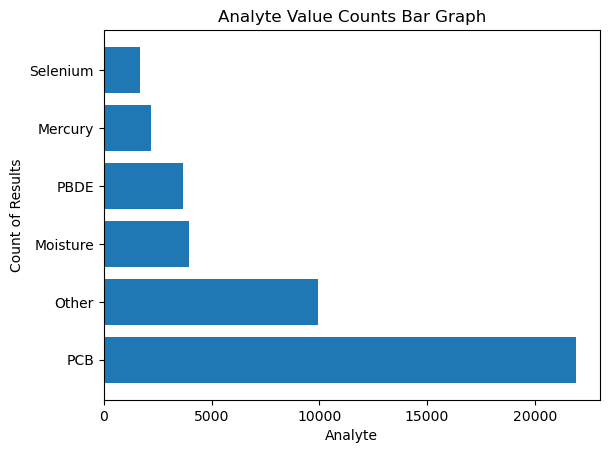

In [219]:
import matplotlib.pyplot as plt

value_counts = df2['Analyte'].value_counts()

plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Analyte')
plt.ylabel('Count of Results')
plt.title('Analyte Value Counts Bar Graph')
plt.show()

I am a little concerned about how many unique instances of PCB observed. I have no idea if it is reality that's being presented , or if something is skewing the data class. This is where the EDA about regarding the duplicate rows could answer. Also, as shown below, 60% of the PCB values are null. With what we have mentioned before, since null values could mean no records or not measured, I am going to set all nulls to 0.

In [220]:
results_null2 = df2.loc[df2['Result'].isnull()] 

In [221]:
results_null2['Analyte'].value_counts(normalize= True)

Analyte
PCB         0.595469
Other       0.269541
PBDE        0.100382
Selenium    0.033952
Mercury     0.000382
Moisture    0.000273
Name: proportion, dtype: float64

In [222]:
df2['Result'] = df2['Result'].fillna(value=0)

In [223]:
df2.isna().sum()

ProjectName                0
CompositeID                0
StationName                0
StationCode                0
Latitude                   0
Longitude                  0
GeometryShape           2986
EarliestDateSampled        0
CompositeType              0
CommonName                 0
TissueName                 0
NumberFishperComp         17
SampleTypeCode             0
CompositeReplicate         0
ResultReplicate            0
Analyte                    0
Unit                       0
Result                     0
OrganismGroup             33
WeightAvg(g)           11379
TLMax(mm)              11247
TLAvgLength(mm)        11247
CompSizeCheck          11247
SexSummary                17
TissueResultRowID          0
CompositeLatitude          0
CompositeLongitude         0
TotalCount                17
ForkLength             12314
TotalLength(mm)        11453
OrganismWeight(g)      11560
Age                    11914
Sex                    11605
TissueWeight(g)            0
CompositeWeigh

In [224]:
df2 = df2.reset_index(drop=True)

In [225]:
df2.duplicated().sum()

7048

Still have duplicated values...for now, I will look into the null values. I will first look at the categorical columns

In [226]:
df2['GeometryShape'].value_counts() 
# I can just fill in nulls with 'Not Provided'

GeometryShape
PolygonCent     20185
Point           17871
Polygon          2031
Not Provided      210
PointCent          57
point              19
Name: count, dtype: int64

In [227]:
df2['GeometryShape'] = df2['GeometryShape'].fillna('Not Provided')

In [228]:
df2['GeometryShape'].value_counts()

GeometryShape
PolygonCent     20185
Point           17871
Not Provided     3196
Polygon          2031
PointCent          57
point              19
Name: count, dtype: int64

In [229]:
df2['Age'].value_counts() 
# this column is mono valued, meaning it doesn't give us any valuable info, drop it

Age
NR    31445
Name: count, dtype: int64

In [230]:
df2= df2.drop('Age',axis=1)

In [231]:
df2['Sex'].value_counts() 
#NR = Not Recorded & UNk = Unknown, we can combine these, and then put the nulls into Not Recorded

Sex
LAB    18646
M       4682
F       4056
NR      3888
Unk      482
Name: count, dtype: int64

In [232]:
df2['Sex'] = df2['Sex'].fillna('NR')

In [233]:
sex = df2['Sex'].str.contains('Unk')
df2.loc[sex, 'Sex'] = 'NR'
df2['Sex'].value_counts()

Sex
LAB    18646
NR     15975
M       4682
F       4056
Name: count, dtype: int64

Both the values LAB & NR are unknown sexes, LAB means they are still in the lab, unidentified, needs to be grouped into NR

In [234]:
sex = df2['Sex'].str.contains('LAB')
df2.loc[sex, 'Sex'] = 'NR'
df2['Sex'].value_counts()

Sex
NR    34621
M      4682
F      4056
Name: count, dtype: int64

Now I am looking at the other numerical columns, which are measurements of size and mass of organisams

In [235]:
#Looking at the median & mean of the ohter numeric analysis columns

name_grouped = df2['CommonName'].unique()
unit = ['WeightAvg(g)','TLMax(mm)','TLAvgLength(mm)','CompSizeCheck','ForkLength','TotalLength(mm)','OrganismWeight(g)','TLMin(mm)']

for col in range(len(unit)): # range function iterates down the length of list
    mean = df2[unit[col]].mean()
    median = df2[unit[col]].median()
    print(unit[col],"      " , round(mean,2), "    ",round(median,2))

WeightAvg(g)        733.42      246.0
TLMax(mm)        332.83      302.0
TLAvgLength(mm)        294.86      260.3
CompSizeCheck        78.98      80.73
ForkLength        233.67      219.0
TotalLength(mm)        287.72      270.0
OrganismWeight(g)        683.65      210.0
TLMin(mm)        264.29      245.0


In [236]:
#find the sum of units grouped by commonname
unit_spe_sum = df2.groupby(['CommonName'])[unit].sum()
unit_spe_sum

,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,ForkLength,TotalLength(mm),OrganismWeight(g),TLMin(mm)
CommonName,,,,,,,,
Asiatic Clam,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.00,0.00,0.0
Barred Surfperch,6.133484e+05,825902.0,6.522340e+05,196182.447351,605846.0,651362.00,599071.70,525531.0
Bat Ray,0.000000e+00,2710.0,2.500000e+03,348.571429,-352.0,2500.00,0.00,2350.0
Black Crappie,2.315560e+03,4169.0,3.773600e+03,2120.998613,3648.0,3812.00,2505.20,3544.0
Black Perch,5.622480e+03,11343.0,9.667200e+03,4267.839196,9153.0,9847.00,5918.60,8493.0
Black Rockfish,5.250500e+03,1083.0,1.071000e+03,290.027701,1056.0,1071.00,5356.00,1047.0
Blue Catfish,3.202436e+06,300264.0,2.793822e+05,26872.906656,261610.0,279066.00,3197540.00,262499.0
Blue Rockfish,1.453300e+04,10821.0,9.382600e+03,2503.988768,8763.0,9067.00,12605.00,8382.0
Bluegill,6.685284e+04,242822.0,1.994067e+05,127966.459067,167182.0,199087.00,66350.35,166135.0


In [237]:
unit_spe_mean = df2.groupby(['CommonName'])[unit].mean()
unit_spe_mean

,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,ForkLength,TotalLength(mm),OrganismWeight(g),TLMin(mm)
CommonName,,,,,,,,
Asiatic Clam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barred Surfperch,201.759329,271.678289,214.550674,64.533700,199.291447,214.263816,199.291983,172.872039
Bat Ray,NaN,677.500000,625.000000,87.142857,-88.000000,625.000000,NaN,587.500000
Black Crappie,89.060000,160.346154,145.138462,81.576870,140.307692,146.615385,96.353846,136.307692
Black Perch,98.640000,199.000000,169.600000,74.874372,160.578947,172.754386,103.835088,149.000000
Black Rockfish,750.071429,361.000000,357.000000,96.675900,352.000000,357.000000,765.142857,349.000000
Blue Catfish,10431.388436,978.058632,910.039902,87.533898,852.149837,909.009772,10415.439739,855.045603
Blue Rockfish,454.156250,338.156250,293.206250,78.249649,273.843750,283.343750,393.906250,261.937500
Bluegill,35.259939,127.599580,104.785447,67.244592,95.587193,104.617446,34.994910,87.301629


In [238]:
unit_spe_mean = df2.groupby(['CommonName'])[unit].mean()
unit_spe_mean

,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,ForkLength,TotalLength(mm),OrganismWeight(g),TLMin(mm)
CommonName,,,,,,,,
Asiatic Clam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barred Surfperch,201.759329,271.678289,214.550674,64.533700,199.291447,214.263816,199.291983,172.872039
Bat Ray,NaN,677.500000,625.000000,87.142857,-88.000000,625.000000,NaN,587.500000
Black Crappie,89.060000,160.346154,145.138462,81.576870,140.307692,146.615385,96.353846,136.307692
Black Perch,98.640000,199.000000,169.600000,74.874372,160.578947,172.754386,103.835088,149.000000
Black Rockfish,750.071429,361.000000,357.000000,96.675900,352.000000,357.000000,765.142857,349.000000
Blue Catfish,10431.388436,978.058632,910.039902,87.533898,852.149837,909.009772,10415.439739,855.045603
Blue Rockfish,454.156250,338.156250,293.206250,78.249649,273.843750,283.343750,393.906250,261.937500
Bluegill,35.259939,127.599580,104.785447,67.244592,95.587193,104.617446,34.994910,87.301629


In [239]:
df2['CommonName'].value_counts()

CommonName
Pacific Oyster                   8439
Largemouth Bass                  6437
Jacksmelt                        3288
Barred Surfperch                 3040
Common Carp                      2041
Tilapia spp.                     2014
Channel Catfish                  1911
Bluegill                         1903
Freshwater Clam                  1395
Spotted Sand Bass                1381
Flathead Catfish                 1283
Shiner Surfperch                 1159
Northern Anchovy                 1021
California Mussel                 921
Rainbow Trout                     752
White Croaker                     588
White Surfperch                   438
Striped Mullet                    427
Sacramento Sucker                 403
Spotted Bass                      346
Chub Mackerel                     330
Blue Catfish                      307
California Corbina                292
Leopard shark                     284
Threadfin Shad                    276
Green Sunfish                     256
W

In [240]:
df2['CommonName'].nunique()

93

In [241]:
df2['StationName'].nunique()

220

In order to make this dataset meaningful, I need to do some research to condense the number of species as I have planned to use this as my indepedent variable. I cannot do any meaningful EDA with 95 species to even determine if this is a good indepedent variable. More research is needed at the moment. I have done some prelimary research as to how to group these species, most likely by taxonomy and trophic level. Additionally, I will have to plot the stationname by longitutd and latitude to see what regional grouping would be appropriate.

In addition, before I get further into analyzing the analytes, one important thing I have to do is to make the result column meaningful. Right now, every result for different types of anaylte is clumped together in one column. I need each of these analytes under it's own column, with each row value representing the result for the tissue sample/organism. The solution I came up to do this is to create a temperory dataframe, pivot that, and then concatentate it back into the main frame.

In [ ]:
# first I need to add an unique identifying key to the master DF
df2['OrignalIndex'] = df2.index
df2.head()

In [ ]:
df2['OrignalIndex'].info() 

In [ ]:
df2['OrignalIndex'] = df2['OrignalIndex'].astype(str)
df2['OrignalIndex'].info() #convert collumn into object so the value is hardcoded

In [ ]:
#Then I create a pivot table using the OrignalIndex column as the new table's index, and save the table as a dataframe
pivot_df = df2.pivot(index = 'OrignalIndex', columns = 'Analyte', values = 'Result' )
pivot_df.head()

In [ ]:
pivot_df.shape

In [ ]:
df2.shape #both dataframe matches in the number of columns

In [ ]:
#Then I create another key using the OriginalIndex, which is now the index of this datafame, in order to call it to concantentate
pivot_df['PivotIndex'] = pivot_df.index
pivot_df.head()

In [ ]:
pivot_df['PivotIndex'].info()

In [ ]:
pivot_df['PivotIndex'].isin(df2['OrignalIndex'] ).value_counts()
#need to make sure that both of the key columns in both dataframe are the same

In [ ]:
#df2.merge(pivot_df, how = 'left',left_on = 'OrignalIndex', right_on ='PivotIndex')

#this operation is too large for my browser to handle and kept crashing my kernel
# I comment this out but left it here to show what function I used "offline"


To get around this technical issue... I figured to export both dataframes, use the above function in Terminal, create a merged copy of new csv, to be continued on the next notebook.

Originally, this method worked because I had decided to drop all my duplicate rows. However, after the presentation, Arjun, a marine biologist, gave me feed backs as to why I should look more into the duplicate rows before dropping them since nulls or 0 has meaning in this context. Dropping them prematurely could skew my analysis. However, these duplicated values are causing error on this merge method since it's a thing that happens with Pandas when you try to merge a pivot table with duplicated rows. I did not have enough time today to further do EDA into the duplicates or figure out another method to pivot the columns. This will be part of the next steps besides grouping the locations and species.

In [ ]:
df2.to_csv('Capstone.dfsubset1.csv', index=False) # makes it not save an index col

In [ ]:
pivot_df.to_csv('Capstone.pivotdf.csv', index=False) # makes it not save an index col